# Pandas - High level Data Manipulation

M. V. dos Santos (marcelo.santos at df.ufcg.edu.br)

The latest version of
this [Jupyter notebook](https://jupyter.org/) lecture is available at [https://github.com/mvsantosdev/scientific-python-lectures.git](https://github.com/mvsantosdev/scientific-python-lectures.git).

In [1]:
import pandas as pd

## Introduction

In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license. The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. (Wikipedia)

## DataFrames

The primary pandas data structure. Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects.

In [2]:
df = pd.DataFrame() #empty DataFrame

In [3]:
df

""


In [4]:
data = {'col1': [1, 2], 'col2': [3, 4]}

df = pd.DataFrame(data)

df

,col1,col2
0,1,3
1,2,4


In [5]:
data = {'col1': {8: 1, 9: 2}, 'col2': {8: 3, 9: 4}}

df = pd.DataFrame(data)

df

,col1,col2
8,1,3
9,2,4


In [6]:
data = [{'id': 5, 'col1': 1, 'col2': 3}, {'id': 6, 'col1': 2, 'col2': 4}]

df = pd.DataFrame(data)

df

,id,col1,col2
0,5,1,3
1,6,2,4


In [7]:
df=df.set_index('id')

df

,col1,col2
id,,
5,1,3
6,2,4


In [8]:
df.reset_index(drop=True, inplace=True)

df

,col1,col2
0,1,3
1,2,4


### DataFrame properties

In [9]:
df.size

4

In [10]:
df.shape

(2, 2)

In [11]:
df.ndim

2

In [12]:
df.columns

Index(['col1', 'col2'], dtype='object')

In [13]:
df.columns = ['val1', 'val2']

df

,val1,val2
0,1,3
1,2,4


In [14]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [15]:
df.index = ['a', 'b']

df

,val1,val2
a,1,3
b,2,4


In [16]:
df.index

Index(['a', 'b'], dtype='object')

In [17]:
df.values

array([[1, 3],
       [2, 4]])

## Accessing values

Accessing columns:

In [18]:
df['val1']

a    1
b    2
Name: val1, dtype: int64

In [19]:
df.val1

a    1
b    2
Name: val1, dtype: int64

Accessing rows:

In [20]:
df.loc['a']

val1    1
val2    3
Name: a, dtype: int64

In [21]:
df.iloc[0]

val1    1
val2    3
Name: a, dtype: int64

In [22]:
df.loc['a', 'val1'], df.iloc[0, 0]

(1, 1)

In [23]:
df.loc[:, 'val1'] #much faster for large datasets

a    1
b    2
Name: val1, dtype: int64

Columns and rows return as Series objects. One-dimensional ndarray with axis labels (including time series).

In [24]:
s=df.loc[:, 'val1']

type(s)

pandas.core.series.Series

## Operations on DataFrames

All numpy arrays operations are suported

In [77]:
import numpy as np

In [80]:
data = [{'id': 5, 'col1': 1, 'col2': 3}, {'id': 6, 'col1': 2, 'col2': 4}]

df = pd.DataFrame(data)

df

,id,col1,col2
0,5,1,3
1,6,2,4


In [81]:
np.sqrt(df)

,id,col1,col2
0,2.236068,1.000000,1.732051
1,2.449490,1.414214,2.000000


In [83]:
np.cos(df)

,id,col1,col2
0,0.283662,0.540302,-0.989992
1,0.960170,-0.416147,-0.653644


In [86]:
np.mean(df)

id      5.5
col1    1.5
col2    3.5
dtype: float64

In [87]:
np.mean(df, axis=1)

0    3.0
1    4.0
dtype: float64

In [90]:
df.apply(lambda x: x.col1 + x.col2, axis='columns')

0    4
1    6
dtype: int64

## Importing and exploring data

In [26]:
global_clima = pd.read_csv('data/GlobalTemperatures.csv')

In [27]:
global_clima.head(10)

,Date,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1850-01-01,0.749,8.242,-3.206,12.833
1,1850-02-01,3.071,9.970,-2.291,13.588
2,1850-03-01,4.954,NaN,-1.905,14.043
3,1850-04-01,7.217,12.934,1.018,14.667
4,1850-05-01,10.004,NaN,3.811,15.507
5,1850-06-01,13.150,18.946,7.106,16.353
6,1850-07-01,14.492,19.233,8.014,NaN
7,1850-08-01,14.039,18.477,7.406,16.718
8,1850-09-01,NaN,15.846,4.533,15.886
9,1850-10-01,8.091,13.189,2.013,14.831


In [28]:
global_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
Date                              1992 non-null object
LandAverageTemperature            1803 non-null float64
LandMaxTemperature                1803 non-null float64
LandMinTemperature                1805 non-null float64
LandAndOceanAverageTemperature    1802 non-null float64
dtypes: float64(4), object(1)
memory usage: 77.9+ KB


In [29]:
global_clima.Date = pd.to_datetime(global_clima.Date)

global_clima.Date.head()

0   1850-01-01
1   1850-02-01
2   1850-03-01
3   1850-04-01
4   1850-05-01
Name: Date, dtype: datetime64[ns]

In [30]:
global_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
Date                              1992 non-null datetime64[ns]
LandAverageTemperature            1803 non-null float64
LandMaxTemperature                1803 non-null float64
LandMinTemperature                1805 non-null float64
LandAndOceanAverageTemperature    1802 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.9 KB


In [31]:
global_clima = pd.read_csv('data/GlobalTemperatures.csv', index_col='Date', parse_dates=True)

In [32]:
import matplotlib.pyplot as plt

In [33]:
notna=global_clima.dropna()

In [34]:
notna.shape

(1341, 4)

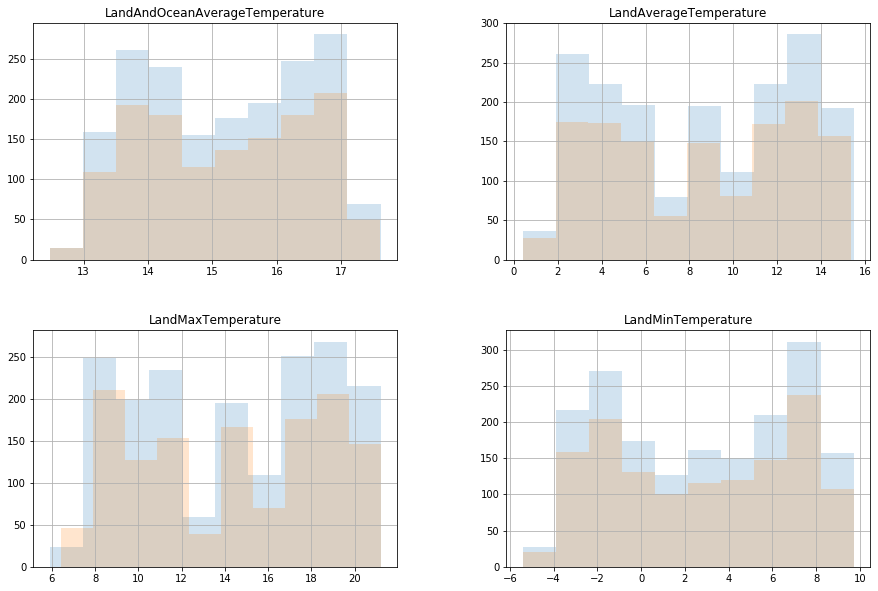

In [35]:
axes=global_clima.hist(figsize=(15, 10), alpha=.2);
notna.hist(figsize=(15, 10), alpha=.2, ax=axes);

global_clima = global_clima.sort_index()

In [36]:
zero=global_clima.fillna(value=0)

zero.head(10)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Date,,,,
1850-01-01,0.749,8.242,-3.206,12.833
1850-02-01,3.071,9.970,-2.291,13.588
1850-03-01,4.954,0.000,-1.905,14.043
1850-04-01,7.217,12.934,1.018,14.667
1850-05-01,10.004,0.000,3.811,15.507
1850-06-01,13.150,18.946,7.106,16.353
1850-07-01,14.492,19.233,8.014,0.000
1850-08-01,14.039,18.477,7.406,16.718
1850-09-01,0.000,15.846,4.533,15.886


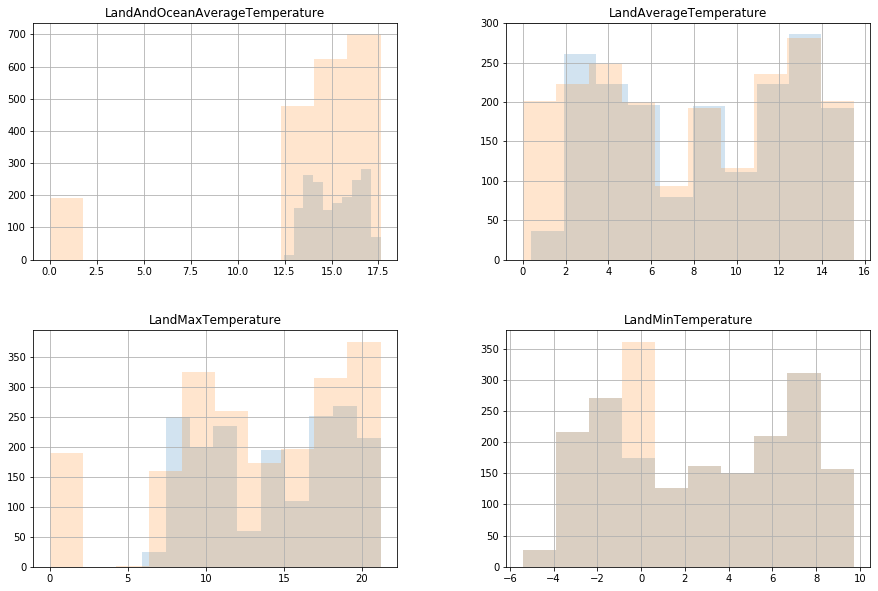

In [37]:
axes=global_clima.hist(figsize=(15, 10), alpha=.2);
zero.hist(figsize=(15, 10), alpha=.2, ax=axes);

In [38]:
ffill=global_clima.fillna(method='ffill')

ffill.head(10)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Date,,,,
1850-01-01,0.749,8.242,-3.206,12.833
1850-02-01,3.071,9.970,-2.291,13.588
1850-03-01,4.954,9.970,-1.905,14.043
1850-04-01,7.217,12.934,1.018,14.667
1850-05-01,10.004,12.934,3.811,15.507
1850-06-01,13.150,18.946,7.106,16.353
1850-07-01,14.492,19.233,8.014,16.353
1850-08-01,14.039,18.477,7.406,16.718
1850-09-01,14.039,15.846,4.533,15.886


In [39]:
bfill=global_clima.fillna(method='bfill')

bfill.head(10)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Date,,,,
1850-01-01,0.749,8.242,-3.206,12.833
1850-02-01,3.071,9.970,-2.291,13.588
1850-03-01,4.954,12.934,-1.905,14.043
1850-04-01,7.217,12.934,1.018,14.667
1850-05-01,10.004,18.946,3.811,15.507
1850-06-01,13.150,18.946,7.106,16.353
1850-07-01,14.492,19.233,8.014,16.718
1850-08-01,14.039,18.477,7.406,16.718
1850-09-01,8.091,15.846,4.533,15.886


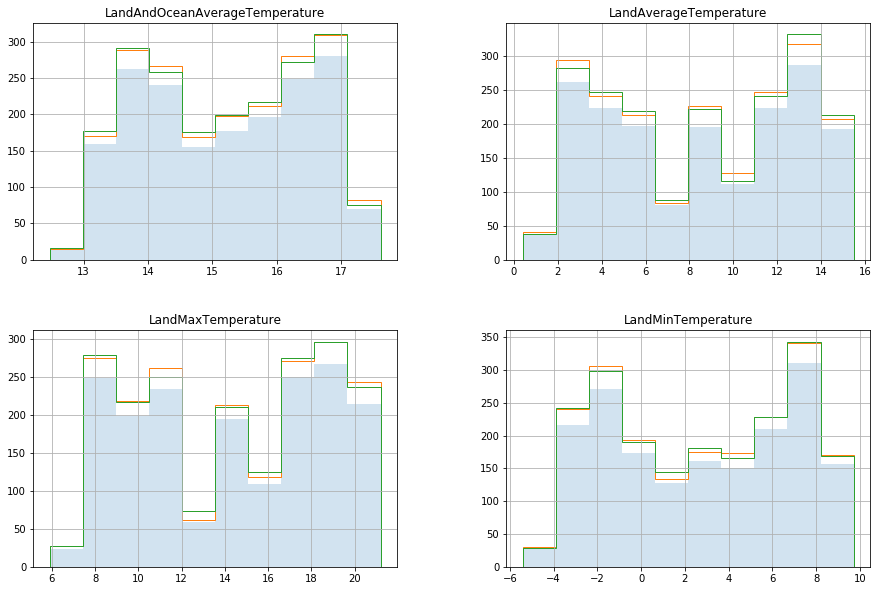

In [40]:
axes=global_clima.hist(figsize=(15, 10), alpha=.2);
bfill.hist(figsize=(15, 10), ax=axes, histtype='step');
ffill.hist(figsize=(15, 10), ax=axes, histtype='step');

In [41]:
linear = global_clima.interpolate()
time = global_clima.interpolate(method='time')
cubic = global_clima.interpolate(method='cubic')

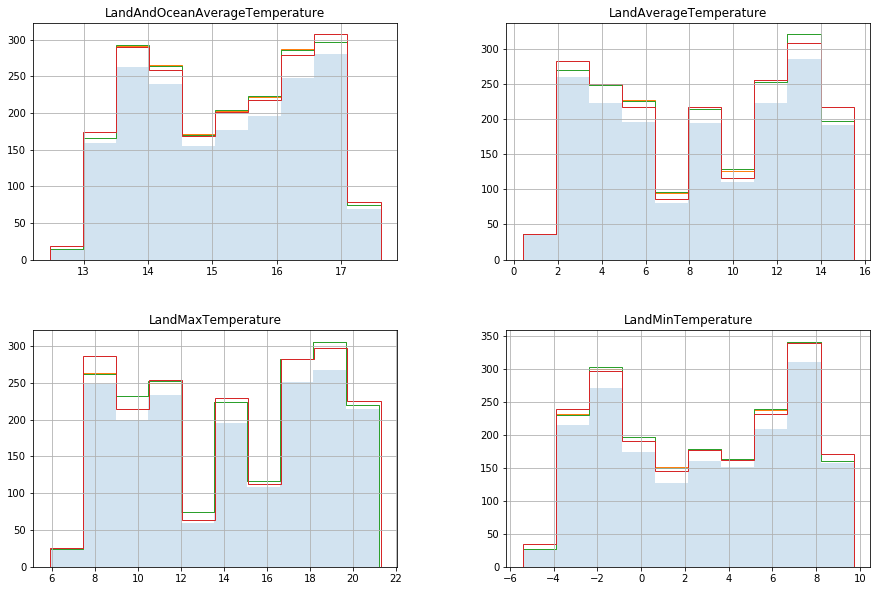

In [42]:
axes=global_clima.hist(figsize=(15, 10), alpha=.2);

linear.hist(figsize=(15, 10), histtype='step', ax=axes);
time.hist(figsize=(15, 10), histtype='step', ax=axes);
cubic.hist(figsize=(15, 10), histtype='step', ax=axes);

In [43]:
amazon_fires = pd.read_csv('data/amazon.csv', encoding='latin1')

In [44]:
amazon_fires.head()

,Ano,Estado,Mês,Número,Período
0,1998,Acre,Janeiro,0.0,01-01-1998
1,1999,Acre,Janeiro,0.0,01-01-1999
2,2000,Acre,Janeiro,0.0,01-01-2000
3,2001,Acre,Janeiro,0.0,01-01-2001
4,2002,Acre,Janeiro,0.0,01-01-2002


In [45]:
amazon_fires.Estado.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [46]:
amazon_fires.groupby('Estado').agg(['mean', 'std'])

Ano                Número            
                            mean       std        mean         std
Estado                                                            
Acre                 2007.460251  5.757484   77.255356  182.970983
Alagoas              2007.500000  5.778332   19.350000   26.733506
Amapá                2007.460251  5.757484   91.345506  191.572878
Amazonas             2007.460251  5.757484  128.243218  224.738973
Bahia                2007.460251  5.757484  187.222703  207.614768
Ceará                2007.460251  5.757484  127.314071  223.462406
Distrito Federal     2007.460251  5.757484   14.899582   29.682323
Espírito Santo       2007.460251  5.757484   27.389121   39.681230
Goiás                2007.460251  5.757484  157.721841  221.249192
Maranhão             2007.460251  5.757484  105.142808  203.952031
Mato Grosso          2007.460251  5.757484  202.836096  284.845988
Mato Grosso do Sul   2007.460251  5.757484  199.866950  211.205700
Minas Gerais         2007.460251  5.757484  156.800243  213.712990
Paraná               2007.460251  5.757484  165.895054  218.526161
Paraíba              2007.460251  5.757484   53.502092   91.590378
Pará                 2007.460251  5.757484  102.561272  207.695643
Pernambuco           2007.460251  5.757484  102.502092  155.821781
Piauí                2007.460251  5.757484  158.174674  245.938544
Rio Grande do Norte  2007.460251  5.757484   39.439331   59.060817
Rio Grande do Sul    2007.460251  5.757484  100.551736  159.963746
Rio de Janeiro       2007.460251  5.757484   48.966527   89.120958
Rondônia             2007.460251  5.757484   84.876272  173.596757
Roraima              2007.460251  5.757484  102.029598  148.765839
Santa Catarina       2007.460251  5.757484  101.924067  175.059028
Sergipe              2007.460251  5.757484   13.543933   22.849461
São Paulo            2007.460251  5.757484  213.896226  240.674027
Tocantins            2007.460251  5.757484  141.037176  229.993182

In [47]:
amazon_fires[['Estado', 'Número']].groupby('Estado').agg(['mean', 'std'])

Número            
                           mean         std
Estado                                     
Acre                  77.255356  182.970983
Alagoas               19.350000   26.733506
Amapá                 91.345506  191.572878
Amazonas             128.243218  224.738973
Bahia                187.222703  207.614768
Ceará                127.314071  223.462406
Distrito Federal      14.899582   29.682323
Espírito Santo        27.389121   39.681230
Goiás                157.721841  221.249192
Maranhão             105.142808  203.952031
Mato Grosso          202.836096  284.845988
Mato Grosso do Sul   199.866950  211.205700
Minas Gerais         156.800243  213.712990
Paraná               165.895054  218.526161
Paraíba               53.502092   91.590378
Pará                 102.561272  207.695643
Pernambuco           102.502092  155.821781
Piauí                158.174674  245.938544
Rio Grande do Norte   39.439331   59.060817
Rio Grande do Sul    100.551736  159.963746
Rio de Janeiro        48.966527   89.120958
Rondônia              84.876272  173.596757
Roraima              102.029598  148.765839
Santa Catarina       101.924067  175.059028
Sergipe               13.543933   22.849461
São Paulo            213.896226  240.674027
Tocantins            141.037176  229.993182

In [48]:
stats=amazon_fires.groupby(['Ano', 'Estado']).describe()

stats  

Número                                                     \
                     count        mean         std     min      25%       50%   
Ano  Estado                                                                     
1998 Acre             12.0   60.833333  146.143039   0.000   0.0000    1.5000   
     Alagoas          12.0    7.166667   11.142330   0.000   0.0000    0.0000   
     Amapá            12.0   23.166667   42.577914   0.000   0.0000    0.0000   
     Amazonas         12.0   78.833333  116.829194   0.000   0.0000    4.0000   
     Bahia            12.0  102.057250  233.424910   0.000   0.0000    2.3435   
...                    ...         ...         ...     ...      ...       ...   
2017 Roraima          11.0  100.090909  101.275322   3.000  32.0000   51.0000   
     Santa Catarina   11.0  214.000000  279.565377  12.000  33.5000   51.0000   
     Sergipe          11.0    6.818182   10.467265   0.000   0.0000    1.0000   
     São Paulo        11.0  230.988000  335.489822   2.868  39.0000  103.0000   
     Tocantins        11.0  125.359909  197.042106   1.320   3.2525   25.0000   

                                    
                        75%    max  
Ano  Estado                         
1998 Acre             38.75  509.0  
     Alagoas          15.25   32.0  
     Amapá            25.50  131.0  
     Amazonas        111.25  321.0  
     Bahia            61.75  815.0  
...                     ...    ...  
2017 Roraima         142.50  327.0  
     Santa Catarina  371.50  713.0  
     Sergipe          12.00   31.0  
     São Paulo       198.00  981.0  
     Tocantins       131.00  576.0  

[540 rows x 8 columns]

In [49]:
stats.index

MultiIndex([(1998,                'Acre'),
            (1998,             'Alagoas'),
            (1998,               'Amapá'),
            (1998,            'Amazonas'),
            (1998,               'Bahia'),
            (1998,               'Ceará'),
            (1998,    'Distrito Federal'),
            (1998,      'Espírito Santo'),
            (1998,               'Goiás'),
            (1998,            'Maranhão'),
            ...
            (2017,               'Piauí'),
            (2017, 'Rio Grande do Norte'),
            (2017,   'Rio Grande do Sul'),
            (2017,      'Rio de Janeiro'),
            (2017,            'Rondônia'),
            (2017,             'Roraima'),
            (2017,      'Santa Catarina'),
            (2017,             'Sergipe'),
            (2017,           'São Paulo'),
            (2017,           'Tocantins')],
           names=['Ano', 'Estado'], length=540)

In [50]:
cols = ['Estado', 'Mês', 'Número']
grouped_cols = ['Estado', 'Mês']

amazon_fires.loc[:, cols].groupby(grouped_cols).mean()

Número
Estado    Mês                  
Acre      Abril        2.050000
          Agosto     319.651700
          Dezembro     2.473684
          Fevereiro    0.950000
          Janeiro      2.000000
...                         ...
Tocantins Maio       283.800000
          Março       45.600000
          Novembro   258.800000
          Outubro     72.170950
          Setembro     4.924750

[324 rows x 1 columns]

In [51]:
idx = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2), ('B', 3)])

df = pd.DataFrame(index=idx)

df['C'] = 1

df

C
A 1  1
  2  1
B 1  1
  2  1
  3  1

In [52]:
idx = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2), ('B', 3)])

df = pd.DataFrame(columns=idx)

df.loc['C'] = 1

df

A     B      
   1  2  1  2  3
C  1  1  1  1  1

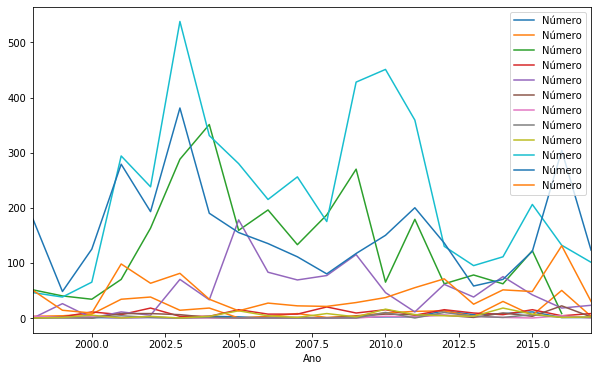

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

idx = amazon_fires.Estado=='Paraíba'
cols = ['Mês', 'Ano', 'Número']

amazon_fires.loc[idx, cols].groupby('Mês').plot(x='Ano', y='Número', ax=ax);

/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


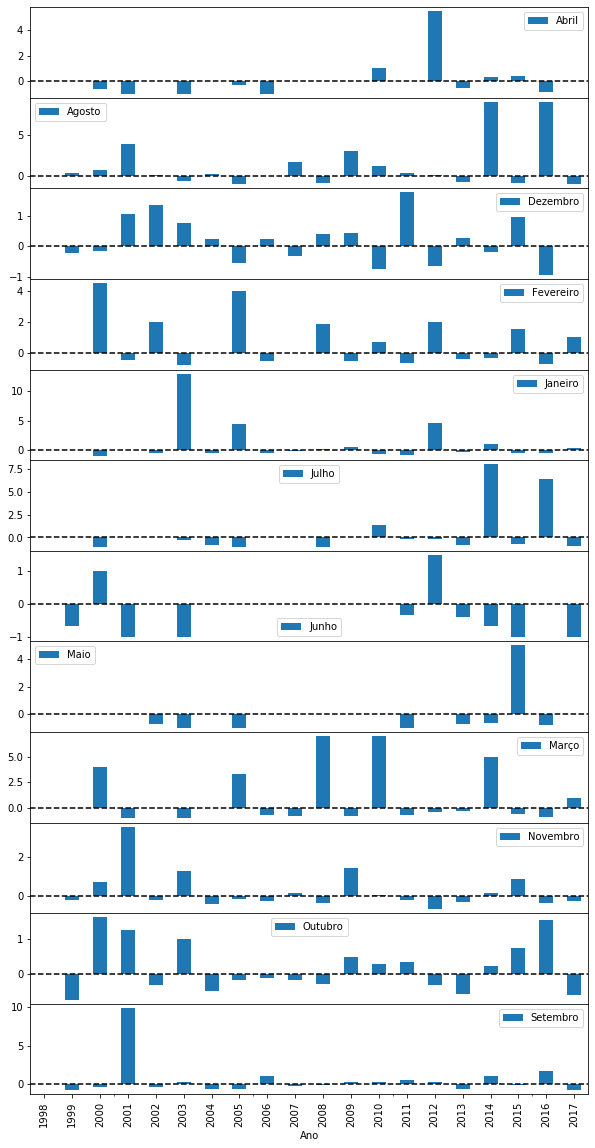

In [54]:
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(10, 20), sharex=True)
plt.subplots_adjust(hspace=.0)

idx = amazon_fires.Estado=='Paraíba'
cols = ['Mês', 'Ano', 'Número']

for ax, (mes, pct) in zip(axes, amazon_fires.loc[idx, cols].groupby('Mês')):
    
    pct['Número'] = pct['Número'].pct_change()
    
    ax.axhline(0, color='k', linestyle='--')
    
    pct.plot(x='Ano', y='Número', kind='bar', ax=ax, label=mes)
    
ax.legend(ncol=3)

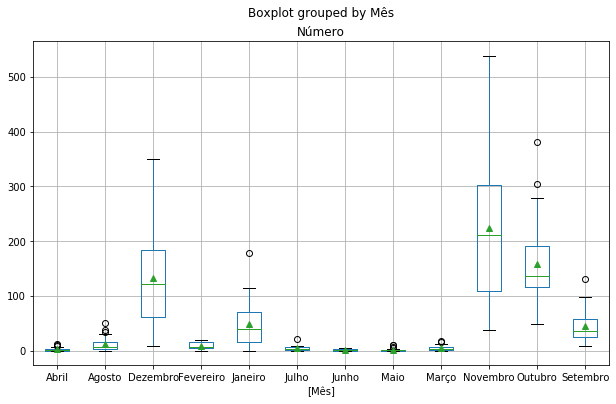

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

idx = amazon_fires.Estado=='Paraíba'
cols = ['Mês', 'Número']

amazon_fires.loc[idx, cols].boxplot(by='Mês', showmeans=True, ax=ax)

In [56]:
amazon_fires.loc[idx, cols].groupby('Mês').describe()

Número                                                            
           count        mean         std   min     25%    50%     75%    max
Mês                                                                         
Abril       20.0    2.750000    3.795773   0.0    0.00    1.0    3.00   13.0
Agosto      20.0   12.950000   14.080502   0.0    3.00    7.5   15.00   50.0
Dezembro    19.0  132.526316   95.309652   8.0   62.00  122.0  183.00  351.0
Fevereiro   20.0    8.900000    5.711484   0.0    4.75    7.5   15.00   20.0
Janeiro     20.0   49.050000   44.024485   0.0   16.25   40.0   71.25  178.0
Julho       20.0    4.200000    5.197165   0.0    1.00    2.5    6.25   22.0
Junho       20.0    1.250000    1.585294   0.0    0.00    0.5    2.25    5.0
Maio        20.0    1.900000    3.193744   0.0    0.00    0.5    1.50   10.0
Março       20.0    4.850000    5.244295   0.0    1.00    3.0    6.25   18.0
Novembro    20.0  224.450000  142.694549  38.0  108.50  210.5  303.25  538.0
Outubro     20.0  157.750000   84.207060  48.0  115.50  135.5  190.75  381.0
Setembro    20.0   45.400000   31.184342   9.0   24.25   35.5   57.00  131.0

## Merge, join and concatenate

In [57]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'], 'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'], 'value': [5, 6, 7, 8]})

In [58]:
pd.concat?

In [59]:
pd.concat((df1, df2))

/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,lkey,rkey,value
0,foo,NaN,1
1,bar,NaN,2
2,baz,NaN,3
3,foo,NaN,5
0,NaN,foo,5
1,NaN,bar,6
2,NaN,baz,7
3,NaN,foo,8


In [60]:
pd.concat((df1, df2), ignore_index=True)

/home/marcelo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,lkey,rkey,value
0,foo,NaN,1
1,bar,NaN,2
2,baz,NaN,3
3,foo,NaN,5
4,NaN,foo,5
5,NaN,bar,6
6,NaN,baz,7
7,NaN,foo,8


In [61]:
df1.set_index?

In [62]:
ndf1=df1.set_index('lkey')
ndf2=df2.set_index('rkey')

pd.concat((ndf1, ndf2), keys=['lkey', 'rkey'])

value
     lkey       
lkey foo       1
     bar       2
     baz       3
     foo       5
rkey foo       5
     bar       6
     baz       7
     foo       8

In [63]:
pd.concat((df1, df2), axis=1, keys=['df1', 'df2'])

df1        df2      
  lkey value rkey value
0  foo     1  foo     5
1  bar     2  bar     6
2  baz     3  baz     7
3  foo     5  foo     8

In [64]:
df2.index=[2, 3, 4, 5]

In [65]:
pd.concat((df1, df2), axis=1)

,lkey,value,rkey,value
0,foo,1.0,NaN,NaN
1,bar,2.0,NaN,NaN
2,baz,3.0,foo,5.0
3,foo,5.0,bar,6.0
4,NaN,NaN,baz,7.0
5,NaN,NaN,foo,8.0


In [66]:
df1.merge(df2)

,lkey,value,rkey
0,foo,5,foo


In [67]:
df1.merge(df2, how='left')

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,foo


In [68]:
df1.merge(df2, how='outer')

,lkey,value,rkey
0,foo,1,NaN
1,bar,2,NaN
2,baz,3,NaN
3,foo,5,foo
4,NaN,6,bar
5,NaN,7,baz
6,NaN,8,foo


In [69]:
df1.join(df2, lsuffix='_caller', rsuffix='_other')

,lkey,value_caller,rkey,value_other
0,foo,1,NaN,NaN
1,bar,2,NaN,NaN
2,baz,3,foo,5.0
3,foo,5,bar,6.0


## Reshaping DataFrames

In [70]:
import numpy as np

In [71]:
df = pd.DataFrame({
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']
})

df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [72]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [73]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [74]:
amazon_fires.pivot_table(index='Período', columns='Estado', values='Número')

Estado,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Período,,,,,,,,,,,,,,,,,,,,,
01-01-1998,60.833333,7.166667,23.166667,78.833333,102.057250,134.334500,8.583333,18.166667,62.509917,30.490333,...,124.464750,14.666667,72.583333,8.500000,76.333917,1.750000,4.916667,1.666667,266.333333,76.052833
01-01-1999,27.750000,14.333333,8.416667,88.416667,99.798500,140.666667,3.833333,20.000000,159.174667,106.370167,...,167.953167,24.250000,31.925833,29.666667,17.410167,18.333333,30.333333,7.750000,354.100917,50.673083
01-01-2000,36.166667,10.250000,21.083333,71.083333,114.886250,184.250000,4.000000,14.583333,209.691083,103.645583,...,92.638083,12.083333,32.000000,10.083333,72.302917,30.166667,25.500000,1.416667,344.000000,82.796167
01-01-2001,69.000000,7.166667,108.416667,108.083333,202.304250,153.958417,5.333333,10.833333,172.155250,60.011417,...,60.896667,25.083333,20.750000,25.583333,83.671583,109.092333,16.666667,2.000000,243.833333,169.923417
01-01-2002,128.662417,21.500000,71.841333,237.666667,190.058333,37.842333,12.416667,24.750000,134.942917,44.175833,...,125.307167,56.583333,138.416667,50.416667,121.007167,185.333333,142.916667,17.333333,294.916667,159.906500
01-01-2003,78.909833,24.916667,137.666667,127.022333,256.345833,66.293667,8.000000,59.000000,173.237083,80.203500,...,163.664917,105.166667,135.284917,46.083333,122.076000,149.094250,134.071000,33.583333,275.500000,131.859583
01-01-2004,98.664833,13.250000,188.416667,191.517250,137.034083,31.939583,23.250000,14.500000,149.894833,99.765417,...,148.133833,55.083333,196.250000,35.083333,76.689167,121.416667,246.250000,15.833333,238.666667,83.600833
01-01-2005,82.037583,18.083333,105.916667,138.094000,196.505500,56.685083,7.666667,10.083333,142.421500,98.632000,...,184.249833,69.083333,94.166667,28.166667,139.850250,71.666667,123.583333,16.666667,176.916667,116.512833
01-01-2006,101.780833,13.416667,68.083333,83.136667,209.090417,92.431083,6.333333,17.916667,107.871917,77.030750,...,196.505083,43.416667,131.583333,33.416667,56.682667,103.750000,154.583333,12.250000,184.083333,83.536000


In [75]:
amazon_fires.pivot_table(index='Ano',columns='Estado', values='Número')

Estado,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
1998,60.833333,7.166667,23.166667,78.833333,102.057250,134.334500,8.583333,18.166667,62.509917,30.490333,...,124.464750,14.666667,72.583333,8.500000,76.333917,1.750000,4.916667,1.666667,266.333333,76.052833
1999,27.750000,14.333333,8.416667,88.416667,99.798500,140.666667,3.833333,20.000000,159.174667,106.370167,...,167.953167,24.250000,31.925833,29.666667,17.410167,18.333333,30.333333,7.750000,354.100917,50.673083
2000,36.166667,10.250000,21.083333,71.083333,114.886250,184.250000,4.000000,14.583333,209.691083,103.645583,...,92.638083,12.083333,32.000000,10.083333,72.302917,30.166667,25.500000,1.416667,344.000000,82.796167
2001,69.000000,7.166667,108.416667,108.083333,202.304250,153.958417,5.333333,10.833333,172.155250,60.011417,...,60.896667,25.083333,20.750000,25.583333,83.671583,109.092333,16.666667,2.000000,243.833333,169.923417
2002,128.662417,21.500000,71.841333,237.666667,190.058333,37.842333,12.416667,24.750000,134.942917,44.175833,...,125.307167,56.583333,138.416667,50.416667,121.007167,185.333333,142.916667,17.333333,294.916667,159.906500
2003,78.909833,24.916667,137.666667,127.022333,256.345833,66.293667,8.000000,59.000000,173.237083,80.203500,...,163.664917,105.166667,135.284917,46.083333,122.076000,149.094250,134.071000,33.583333,275.500000,131.859583
2004,98.664833,13.250000,188.416667,191.517250,137.034083,31.939583,23.250000,14.500000,149.894833,99.765417,...,148.133833,55.083333,196.250000,35.083333,76.689167,121.416667,246.250000,15.833333,238.666667,83.600833
2005,82.037583,18.083333,105.916667,138.094000,196.505500,56.685083,7.666667,10.083333,142.421500,98.632000,...,184.249833,69.083333,94.166667,28.166667,139.850250,71.666667,123.583333,16.666667,176.916667,116.512833
2006,101.780833,13.416667,68.083333,83.136667,209.090417,92.431083,6.333333,17.916667,107.871917,77.030750,...,196.505083,43.416667,131.583333,33.416667,56.682667,103.750000,154.583333,12.250000,184.083333,83.536000


In [76]:
amazon_fires.pivot_table(index='Ano',columns='Estado', values='Número', aggfunc='max')

Estado,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
1998,509.0,32.0,131.0,321.0,815.0,590.0,48.0,108.0,512.0,274.0,...,711.0,55.0,605.0,44.0,483.0,16.0,26.0,12.0,596.0,640.0
1999,209.0,58.0,41.0,479.0,453.0,524.0,16.0,64.0,743.0,895.0,...,872.0,62.0,103.0,192.0,135.0,98.0,101.0,36.0,911.0,373.0
2000,265.0,32.0,157.0,189.0,633.0,875.0,18.0,88.0,925.0,839.0,...,450.0,29.0,126.0,34.0,644.0,125.0,69.0,6.0,915.0,500.0
2001,396.0,30.0,593.0,501.0,979.0,801.0,25.0,38.0,787.0,549.0,...,337.0,56.0,80.0,129.0,796.0,646.0,66.0,5.0,595.0,830.0
2002,728.0,95.0,557.0,928.0,848.0,172.0,53.0,113.0,686.0,230.0,...,534.0,222.0,824.0,313.0,639.0,820.0,702.0,103.0,733.0,976.0
2003,740.0,150.0,750.0,725.0,710.0,384.0,36.0,252.0,902.0,436.0,...,864.0,366.0,828.0,191.0,526.0,767.0,669.0,198.0,977.0,762.0
2004,645.0,71.0,949.0,911.0,423.0,144.0,108.0,48.0,778.0,706.0,...,788.0,284.0,680.0,205.0,452.0,355.0,755.0,66.0,809.0,424.0
2005,547.0,83.0,685.0,676.0,948.0,384.0,24.0,62.0,639.0,529.0,...,943.0,249.0,227.0,116.0,798.0,244.0,391.0,80.0,522.0,669.0
2006,839.0,37.0,405.0,721.0,995.0,581.0,40.0,87.0,588.0,512.0,...,911.0,148.0,642.0,197.0,314.0,385.0,728.0,41.0,694.0,430.0
